# 🏦 Creditworthiness Prediction Using Random Forest
Using the German Credit dataset from UCI and `ucimlrepo` to predict whether an individual is a good or bad credit risk using Random Forest.

In [20]:
# 📦 Install necessary libraries (run only once)
!pip install ucimlrepo pandas scikit-learn matplotlib seaborn joblib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 📥 Step 1: Load Dataset

In [21]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch the dataset
data = fetch_ucirepo(id=144)

# Extract features and target
X = data.data.features
y = data.data.targets

# Preview data
print(X.head())
print(y.head())

  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0        A75           4        A93        A101            4        A121   
1        A73           2        A92        A101            2        A121   
2        A74           2        A93        A101            3        A121   
3        A74           2        A93        A103            4        A122   
4        A73           3        A93        A101            4        A124   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0           67        A1

## 🧹 Step 2: Data Preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder

# Combine features and target
df = pd.concat([X, y], axis=1)

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


## ✂️ Step 3: Split Dataset

In [23]:
from sklearn.model_selection import train_test_split

# Use correct target column name (check with print(df.columns))
target_column = 'class'  # 👈 change this if needed

X = df.drop(target_column, axis=1)
y = df[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🌲 Step 4: Train Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 📊 Step 5: Evaluate the Model

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.93      0.87       141
           2       0.75      0.51      0.61        59

    accuracy                           0.81       200
   macro avg       0.78      0.72      0.74       200
weighted avg       0.80      0.81      0.79       200

Confusion Matrix:
 [[131  10]
 [ 29  30]]


## 📈 Step 6: Visualize Feature Importance

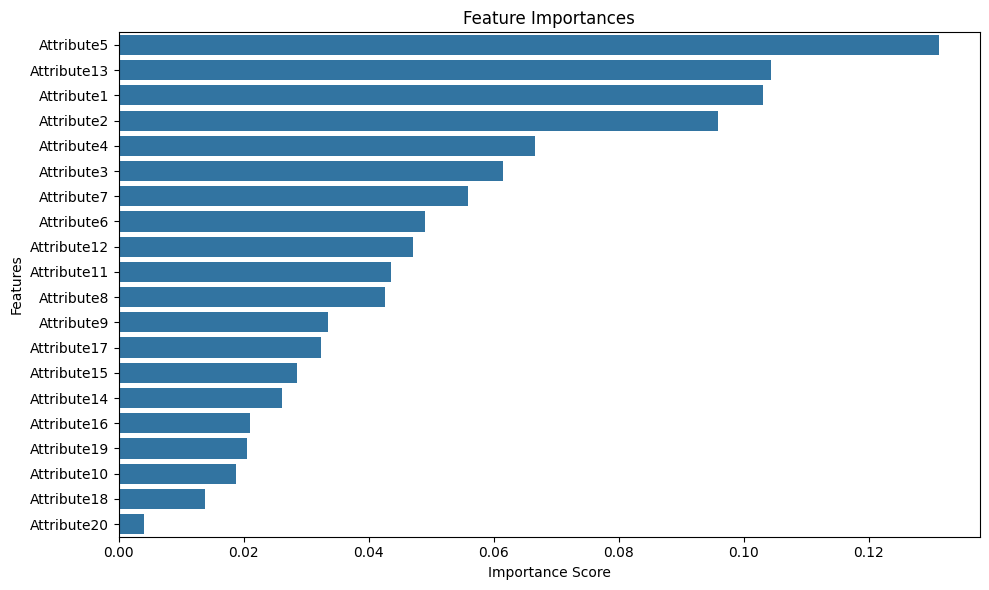

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## 💾 Step 7: Save the Model (Optional)

In [27]:
import joblib

# Save model
joblib.dump(model, "credit_rf_model.pkl")

# Load later (if needed)
# loaded_model = joblib.load("credit_rf_model.pkl")

['credit_rf_model.pkl']

In [28]:
from sklearn.preprocessing import LabelEncoder
import joblib

categorical_cols = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9']  # <- change as needed
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Save for streamlit app
joblib.dump(label_encoders, "label_encoders.pkl")


['label_encoders.pkl']